In [11]:
# run for local jupyter notebook
%matplotlib notebook
from fits_mask_tools import MaskPainter, BinnedFitsViewer, FitsViewer
from galaxylib import GalaxyLibrary
import matplotlib.pyplot as plt
import numpy as np
import h5py

Load the Saved State
Restore the configuration and image saved at the end of Day 1.
- Feel free to re-adjust the binning or image scaling using the sliders

<IPython.core.display.Javascript object>


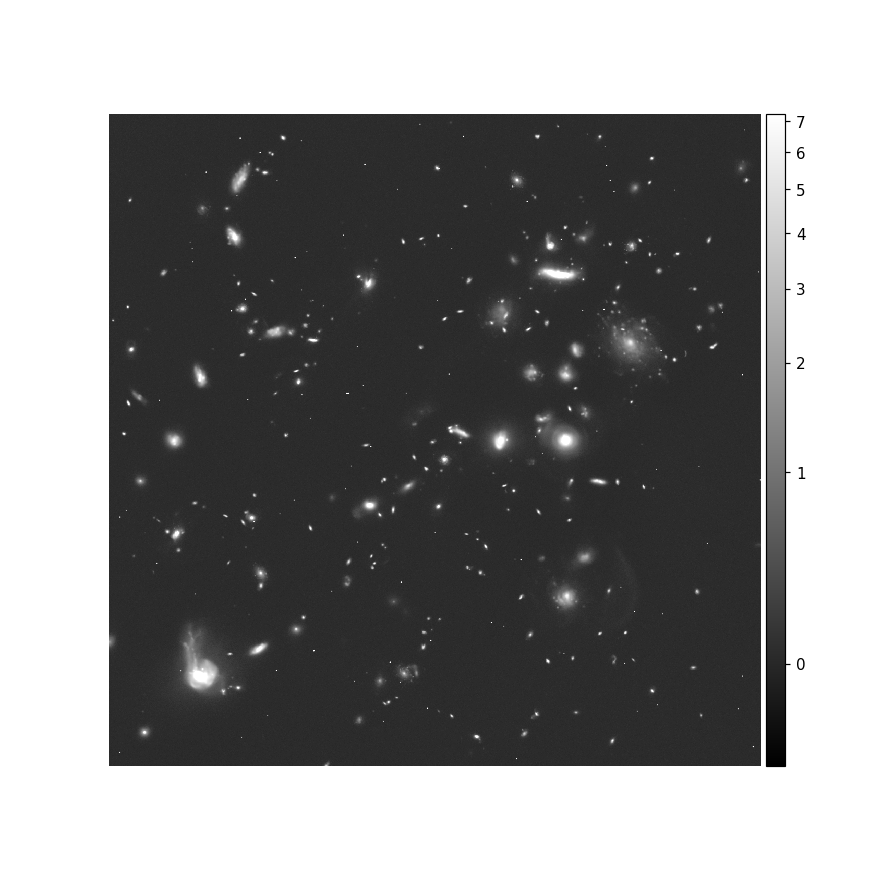

interactive(children=(Dropdown(description='stretch', index=3, options=('linear', 'log', 'sqrt', 'asinh'), val…

IntSlider(value=1, description='Binning', max=20, min=1)

In [2]:
rebinned_fv = BinnedFitsViewer.load_state()

## Types of Tidal Features in Galaxies

When studying low-surface-brightness structures around galaxies, it can help to distinguish between different types of tidal features. These features provide insight into the galaxy's interaction history and the dynamics of its stellar halo. Here we describe the main classes:

### 1. Stellar Streams
Stellar streams are elongated structures composed of stars orbiting the host galaxy. Their appearance depends on the viewing angle and the orbit of the progenitor system; they can appear as ellipses, spirals, or straight lines. Each stream represents a distinct event of material being stripped from a satellite galaxy. For example, an image might show a single clear stream or multiple independent streams around the same galaxy due to multiple satellites.

![Stellar stream](./example_images/streams.png)

### 2. Tidal Tails
Tidal tails are extended features that originate from material ejected during strong interactions between galaxies of comparable mass. Unlike stellar streams, which are often formed gradually, tidal tails consist of stars and gas that have been unbound from a galaxy during a close encounter or merger. They trace the path of recently stripped material and can extend over tens of kiloparsecs.

![Tidal tails](./example_images/tails.png)

### 3. Plumes or Asymmetric Stellar Halos
Plumes are diffuse, low-surface-brightness structures in the outer regions of galaxies that do not form well-defined streams or tails. They can include irregular, asymmetric features in the stellar halo, often reflecting past accretion or minor mergers. Unlike streams or tails, plumes have no clear geometry.

![Plumes](./example_images/plumes.png)

### 4. Shells
Shells appear as concentric, arc-like or ring-like structures around a galaxy. These radial features usually do not cross one another and are thought to form from phase-wrapped material during minor mergers. Shells provide a record of past accretion events, often from smaller companions.

![Shells](./example_images/shells.png)

### 5. Tidal Bridges
A tidal bridge is a specific type of tidal tail that connects two interacting galaxies. Bridges are formed when material is pulled out during a high-mass-ratio encounter, linking the two galaxies. Unlike isolated tidal tails, which may extend into the halo, bridges physically connect the interacting systems.

![Tidal bridges](./example_images/bridge.png)

### 6. Merger Remnants
Merger remnants are galaxies that show strong morphological disturbances resulting from a recent coalescence of two progenitors along with extended diffuse emission such as tidal tails, shells or other diffise debris.

![Merger remnants](./example_images/merger_remnant.png)

---

By carefully identifying and classifying these tidal features in images, we can reconstruct some idea of the interaction history of galaxies and gain insight into the hierarchical assembly of halos.


## Instructions for Using the Mask Painter

**Initial setup:** Click on the image to create a zoom crop around the region you want to mask. The zoomed-in area will appear in the viewer.

**Painting masks:**

- Click and drag the mouse over features you want to mask.

- Adjust the brush size using the slider to cover larger or smaller regions.

- While painting, the zoom slider is disabled.

**Committing a mask:** When you have finished painting a mask in the current zoom region, press the **`next mask`** button. This commits the current mask and allows you to start painting a new feature.

**Resetting the view:** To return to the full image at any time, press Return to original.

*Note: Any uncommitted mask in the zoomed region will be discarded.*

**Saving all masks:**

Once you have painted and committed all regions of interest, press **`save masks`**. This will write all masks and their associated cutouts to ./masks/masks_data.hdf5.

**Tips:**

- Make sure to commit each mask before moving to a new region.

- Use the zoom slider to focus on small details or larger regions as needed.

- The overlay shows the masks in semi-transparent colours so you can see what has already been masked.

### Exercise: Identifying tidal features

Use the Mask Painter tool to identify and mask low-surface-brightness tidal features in the image.

- Examine the image carefully to locate features such as **stellar streams, tidal tails, plumes, shells, bridges,** and **merger remnants**.  
- For each feature:
  - Zoom in on a region using the zoom slider.
  - Select the feature type from the dropdown menu
  - Paint around the feature with the brush tool, adjusting the size as needed.
  - Press **`Next mask`** to commit the painted mask before moving to a new feature.
  - Make a note of the type of each feature.
- Continue until you have masked all visible tidal structures in the image.
- When finished, press **`Save masks`** to write all masks and associated cutouts to `./masks/masks_data.hdf5`.

**Goal:** Produce a set of masks for all the tidal features you can identify, which can be used for further analysis or photometry.

<IPython.core.display.Javascript object>


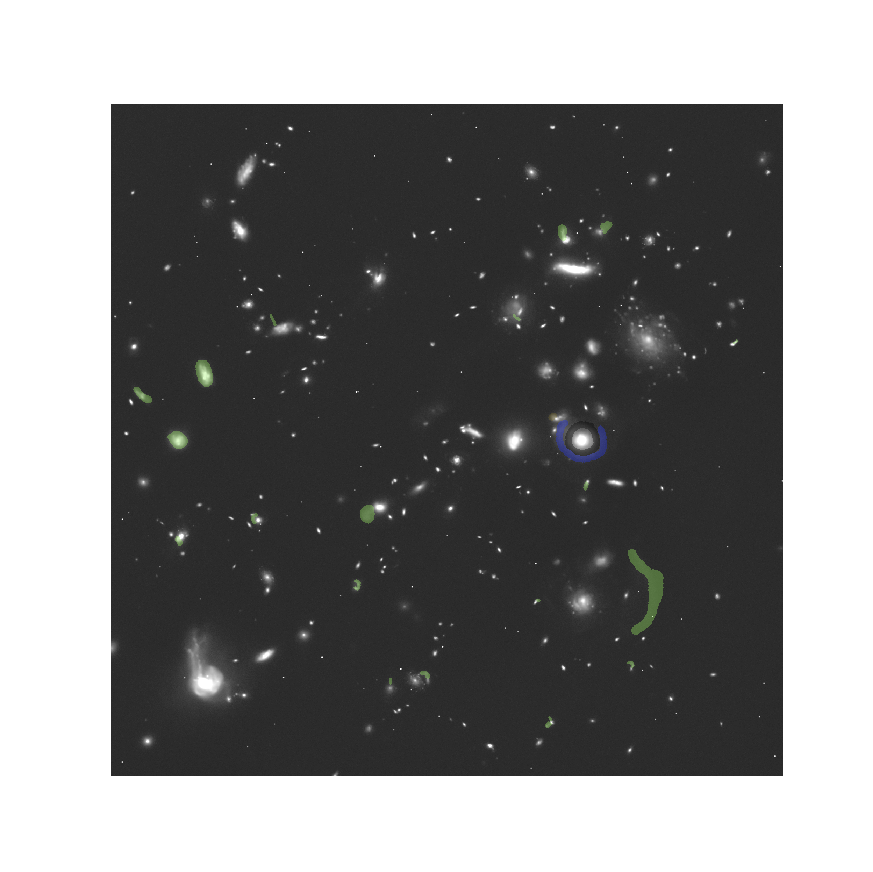

MaskPainter ready — click to create a zoom crop, paint, then commit.
Zoomed to size=170 centred on (861, 620).
Committed mask #1.
Committed mask #2.
Zoomed to size=180 centred on (861, 620).
Zoomed to size=190 centred on (861, 620).
Zoomed to size=200 centred on (861, 620).
Committed mask #3.
Committed mask #4.
Returned to full image (local mask discarded).
Zoomed to size=560 centred on (847, 319).
Committed mask #5.
Zoomed to size=440 centred on (847, 319).
Zoomed to size=320 centred on (847, 319).
Returned to full image (local mask discarded).
Zoomed to size=400 centred on (908, 290).
Zoomed to size=390 centred on (908, 290).
Zoomed to size=380 centred on (908, 290).
Zoomed to size=370 centred on (908, 290).
Zoomed to size=360 centred on (908, 290).
Zoomed to size=350 centred on (908, 290).
Zoomed to size=340 centred on (908, 290).
Zoomed to size=330 centred on (908, 290).
Zoomed to size=320 centred on (908, 290).
Zoomed to size=310 centred on (908, 290).
Zoomed to size=300 centred o

In [4]:
painter = MaskPainter(rebinned_fv)

After saving, use the `plot_saved_masks()` function to visualise the masked regions

## Exercise: Visualising your saved masks

**Aim.** Inspect the masks you have painted and saved.

### Steps

1. Use `MaskPainter.plot_saved_masks('./masks/masks_data.hdf5')` to display all saved masks.   

<IPython.core.display.Javascript object>


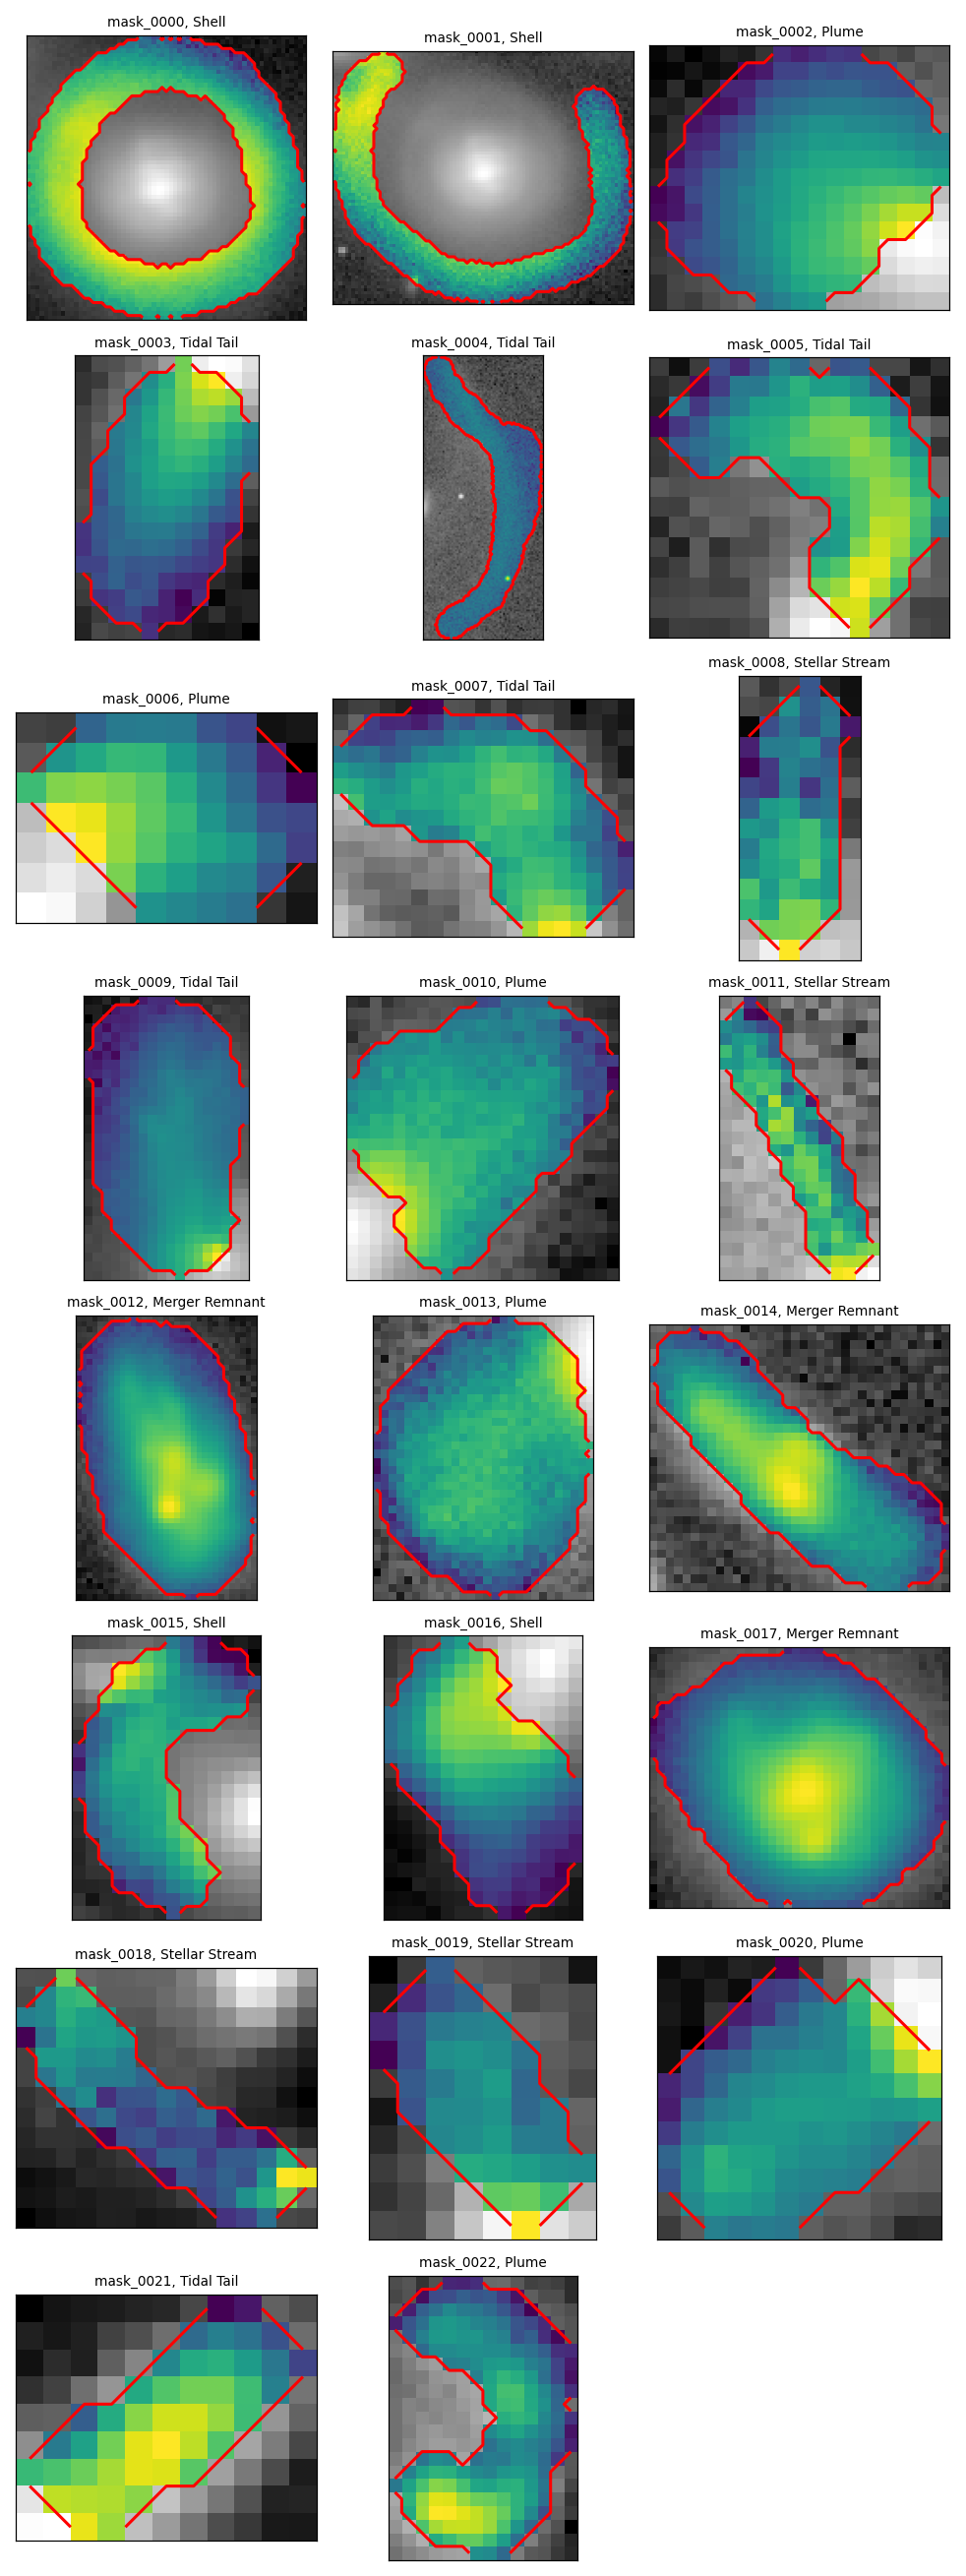

In [5]:
dict_masks = MaskPainter.plot_saved_masks('./masks/masks_data.hdf5')

2. Examine each cutout and overplotted mask:
   - Confirm the mask covers the intended tidal feature fully.  
   - Check that the contour correctly outlines the masked region.  
   - Check that the feature label corresponds to the expected type. 

### Exercise: Measuring the Surface Brightness of Tidal Features

In this exercise, you will use the masks you created to quantify the brightness of tidal features.

- For each highlighted feature in your mask set:
  - Compute the average surface brightness within the painted region.  
  - We can use the following conversions:

In [6]:
FLUXMAG0 = 63095734448.0194  # counts -> magnitudes
IMAGE_SCALE = 0.2 * rebinned_fv.bin_slider.value  # arcsec / pixel

*Note on image scale:*

  Since we have rebinned the image, the pixel size is effectively larger than the original `IMAGE_SCALE`:
$$
\text{IMAGE_SCALE} = 0.2 \times \text{bin_factor} \quad [\text{arcsec/pixel}]
$$

Given a masked image of a tidal feature, we can define the **mean** and **median** surface brightness in units of mag/arcsec² as follows.

Let $F_i$ be the counts in pixel $i$ of the masked region, and $\text{pixscale}$ the pixel scale in arcsec/pixel. Also, let $\mathrm{FLUXMAG0}$ be the zero-point flux corresponding to 0 mag.


1. Modify the code below to:
 - convert total counts in ADU and area in pixels for each mask to calculate mean surface brightness in  mag / arcsec$^{2}$
 $$
\langle \mu \rangle = -2.5 \log_{10} \left( \frac{ \sum_{i=1}^{N} F_i }{ N \, \mathrm{pixscale}^2 \, \mathrm{FLUXMAG0} } \right)
$$
 - calculate the median surface brightness per pixel
 $$
\mu_{\rm med} = -2.5 \log_{10} \left( \frac{ \mathrm{median}(F_i) }{ \mathrm{pixscale}^2 \, \mathrm{FLUXMAG0} } \right)
$$

- The **mean** accounts for all pixels, so bright spots within the feature (e.g., compact clumps) can skew it higher.  
- The **median** is less sensitive to outliers, reflecting the typical surface brightness of the majority of the feature.  

In [7]:
mean_sb = []
median_sb = []
feature_label = []
for mask_name, info in dict_masks.items():
    
    label = info['feature_label']
    img_masked = info['masked_data']
    
    total_counts = np.ma.sum(img_masked)
    area_pixels = np.count_nonzero(img_masked.mask)
            
    print(f"{mask_name}:")
    print(f"  Label: {label}")
    print(f"  Area (pixels): {area_pixels}")
    print(f"  Total counts: {total_counts:.3e}")
    print("-" * 40)
    
    feature_label.append(label)
    
    # ADD YOUR CODE HERE
    
    #mean_sb.append(...
    #median_sb.append(...
    
feature_label = np.asarray(feature_label)
mean_sb = np.asarray(mean_sb)
median_sb = np.asarray(median_sb)

mask_0000:
  Label: Shell
  Area (pixels): 2174
  Total counts: 1.303e+03
----------------------------------------
mask_0001:
  Label: Shell
  Area (pixels): 5238
  Total counts: 6.792e+02
----------------------------------------
mask_0002:
  Label: Plume
  Area (pixels): 75
  Total counts: 1.665e+02
----------------------------------------
mask_0003:
  Label: Tidal Tail
  Area (pixels): 64
  Total counts: 8.900e+01
----------------------------------------
mask_0004:
  Label: Tidal Tail
  Area (pixels): 7131
  Total counts: 3.292e+02
----------------------------------------
mask_0005:
  Label: Tidal Tail
  Area (pixels): 106
  Total counts: 4.104e+01
----------------------------------------
mask_0006:
  Label: Plume
  Area (pixels): 19
  Total counts: 3.405e+01
----------------------------------------
mask_0007:
  Label: Tidal Tail
  Area (pixels): 122
  Total counts: 6.904e+01
----------------------------------------
mask_0008:
  Label: Stellar Stream
  Area (pixels): 26
  Total count

2. Once you have computed the median surface brightness for each masked tidal feature, we can visualise the distribution to identify the faintest structures detectable in the image.

- **Plot a histogram** of the mean and median surface brightnesses:

<IPython.core.display.Javascript object>


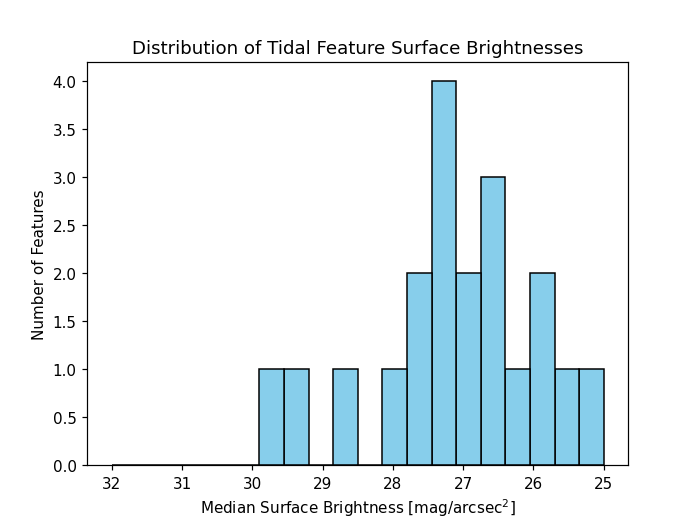

In [8]:
plt.figure()

plt.hist(median_sb, range=[25,32], bins=20, color='skyblue', edgecolor='black')
plt.gca().invert_xaxis()  # brighter on the left
plt.xlabel("Median Surface Brightness [mag/arcsec$^{2}$]")
plt.ylabel("Number of Features")
plt.title("Distribution of Tidal Feature Surface Brightnesses")
plt.show()

Examine the histogram.

- What is the **range of surface brightnesses** across the feature.  
- What are the **faintest regions** that are still detectable above the background noise.
- Is there a significant offset between the mean and median values.

By examining the histogram:

- The **peak** indicates the most common surface brightness within the feature.  
- The **faint tail** shows the lowest surface brightness regions that are still measurable.  
- Comparing histograms for different features can highlight which are easier to detect and which are likely lost in the noise.

3. Visually and quantitatively compare the median surface-brightness values for each tidal-feature class you labelled.

You should already have two parallel arrays:
- `median_sb` — median surface brightness of each feature (mag/arcsec^{2}),  
- `labels` — class label for each feature.

- Plot
  - Use the code below to overplot histograms for each label on the same axes  
  - **optional** Plot cumulative distribution functions (CDFs) for each class on a second axis



<IPython.core.display.Javascript object>


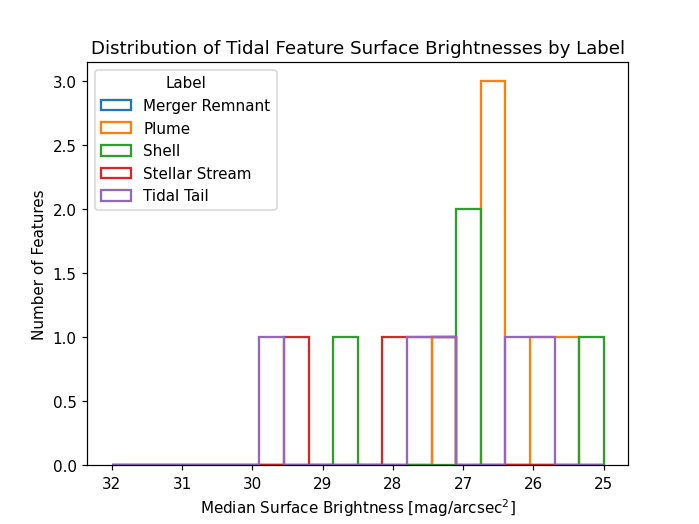

In [9]:
plt.figure()

unique_labels = np.unique(feature_label)

for lab in unique_labels:
    vals = median_sb[feature_label == lab]
    plt.hist(vals,
             range=[25, 32],
             bins=20,
             histtype='step',     # avoids visual clutter
             linewidth=1.5,
             label=str(lab))

plt.gca().invert_xaxis()
plt.xlabel("Median Surface Brightness [mag/arcsec$^{2}$]")
plt.ylabel("Number of Features")
plt.title("Distribution of Tidal Feature Surface Brightnesses by Label")
plt.legend(title="Label")
plt.show()

- **Summary statistics**
  - For each class compute and record:
    - sample size $n$,
    - median and IQR (75th–25th percentile),

- **Interpretation**
  - Compare the medians: which feature types are generally brighter or fainter?  
  - Look at the IQRs: which classes show a wide range of surface brightnesses and which are more uniform?  
  - Consider the sample size $n$: rarer features may be intrinsically fainter or simply harder to detect.  
  - Reflect on detectability: faint features may be missing from your sample, biasing the observed distributions. 
  - Discuss how both abundance and detectability influence the conclusions you can draw about the physical properties and frequency of tidal features.


Finally, We'll examine a much deeper version of the image than the one used for labelling. 

- As before you can change the image stretch etc to better recover tidal features

<IPython.core.display.Javascript object>


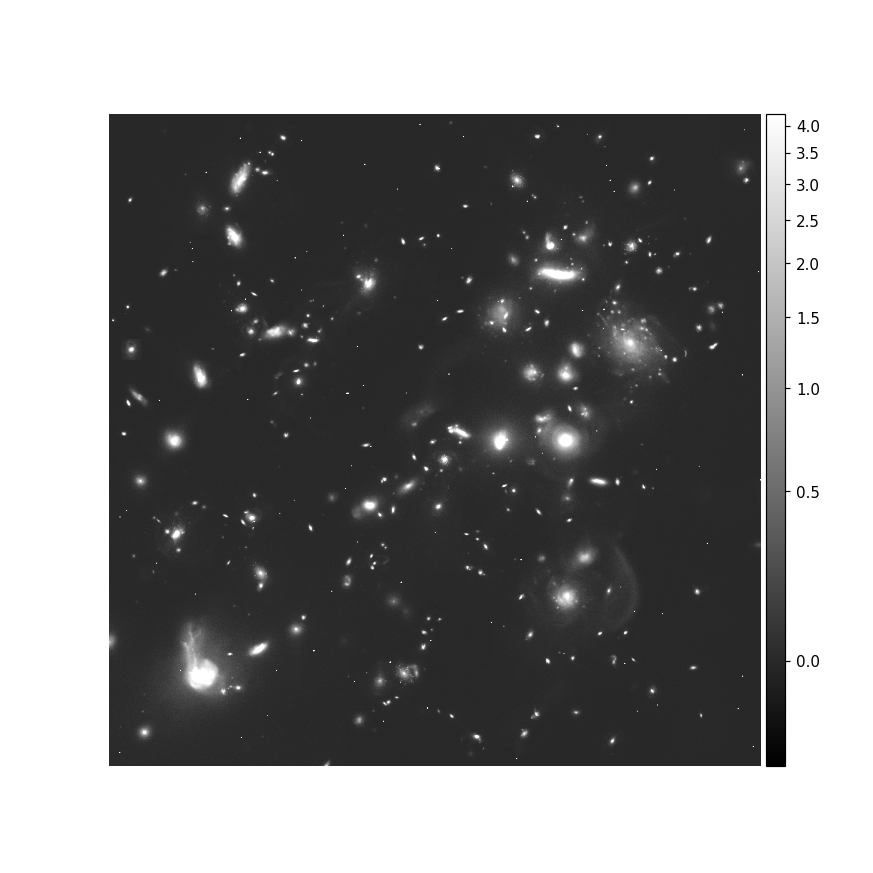

interactive(children=(Dropdown(description='stretch', options=('linear', 'log', 'sqrt', 'asinh'), value='linea…

In [14]:
FLUXMAG0 = 63095734448.0194 # counts to magnitudes
IMAGE_PSF = 1.0 / 0.2 / 2.355 # 1 arcsec FWHM PSF
IMAGE_SCALE = 0.2 # pixel size in arcsec
library_path = './library'

lib = GalaxyLibrary(library_path)

n_x = 5000
n_y = 5000

# create a mosaic of galaxies
canvas = lib.create_canvas((5000, 5000), n_objects=320, seed=1, z_min=0.08)
canvas = lib.create_canvas((5000, 5000), n_objects=110, seed=8, z_min=0., z_max=0.08)

canvas = lib.inject_specific(canvas, [('obj_00002_z0.05_904.h5', n_x//2-1800, n_y//2-1800),
                                      ('obj_00001_z0.05_658.h5', n_x//2+1000, n_y//2-1200),
                                      ('obj_00003_z0.05_658.h5', n_x//2+500, n_y//2),
                                      ('obj_00025_z0.05_791.h5', n_x//2-1350, n_y//2-1600),
                                      ('obj_00038_z0.05_658.h5', 700, 3000),
                                      ('obj_00019_z0.05_658.h5', 3500, 2500),
                                      ('obj_00013_z0.05_658.h5', 1000, 4500),
                                      ('obj_00135_z0.05_904.h5', 2000, 2000),
                                      ('obj_00036_z0.05_791.h5', 500, 2500),
                                      ('obj_00009_z0.05_904.h5', 3500, 3000),
                                      ('obj_00076_z0.05_658.h5', 3000, 3500),
                                      ('obj_00004_z0.05_904.h5', 4000, 3250)
                                      ], scale=4, flux_scale=0.8)


canvas_adu = canvas * FLUXMAG0

del canvas

# add a sky and stars
img_sky, bg_model, noise = lib.add_sky(canvas_adu,
            sky_mag=100.0,
            fluxmag0=FLUXMAG0,
            pixscale=IMAGE_SCALE,
            effective_gain=1000.,
            n_stars=100,
            star_mag_range=(18., 22.),
            psf_sigma=IMAGE_PSF,
            sb_noise_mag=35.0,
            seed=1)

fv = FitsViewer(img_sky)

This reveals numerous faint tidal features that were invisible in the shallower data, including:

- Extremely diffuse galaxy outskirts  
- Numerous Very low-surface-brightness streams
- Tidal features around lower-mass galaxies

By comparing this deep view to the features you labelled, it becomes clear that many tidal structures remain undetectable in typical survey data:

- The abundances measured in this exercise are lower limits.  
- Surface-brightness limits strongly bias which features can be detected.  
- Upcoming deeper surveys will likely uncover far more faint tidal debris than currently catalogued, but don't approach the depths necessary to recover complete samples of tidal features.  
